<a href="https://colab.research.google.com/github/codefinite-vri/CodersWeek-ML/blob/master/WholesaleCustomerData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **UNSUPERVISED LEARNING** 

**About the dataset used**

The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

Attribute Information:

1)	FRESH: annual spending (m.u.) on fresh products (Continuous)

2)	MILK: annual spending (m.u.) on milk products (Continuous)

3)	GROCERY: annual spending (m.u.)on grocery products (Continuous)

4)	FROZEN: annual spending (m.u.)on frozen products (Continuous)

5)	DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous) 

6)	DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous)

7)	CHANNEL: Type of channel

8)	REGION: Type of region(Nominal) 

Descriptive Statistics: Source: UCI Wholesale customers Data Set (https://archive.ics.uci.edu/ml/datasets/wholesale+customers)

# UNSUPERVISED LEARNING - K-MEANS CLUSTERING

Importing the libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
%matplotlib inline

Loading the dataset

In [0]:
dataset = pd.read_csv("http://iali.in/datasets/IEEEAPSIT/unsupervised-ml/Wholesale%20customers%20data.csv")

In [115]:
#Displays first 10 values
dataset.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


Setting x and y values

In [0]:
x = dataset.iloc[:,2:8].values
y = dataset.iloc[:,[0,1]].values

In [117]:
x

array([[12669,  9656,  7561,   214,  2674,  1338],
       [ 7057,  9810,  9568,  1762,  3293,  1776],
       [ 6353,  8808,  7684,  2405,  3516,  7844],
       ...,
       [14531, 15488, 30243,   437, 14841,  1867],
       [10290,  1981,  2232,  1038,   168,  2125],
       [ 2787,  1698,  2510,    65,   477,    52]])

In [118]:
y

array([[2, 3],
       [2, 3],
       [2, 3],
       [1, 3],
       [2, 3],
       [2, 3],
       [2, 3],
       [2, 3],
       [1, 3],
       [2, 3],
       [2, 3],
       [2, 3],
       [2, 3],
       [2, 3],
       [2, 3],
       [1, 3],
       [2, 3],
       [1, 3],
       [2, 3],
       [1, 3],
       [2, 3],
       [1, 3],
       [1, 3],
       [2, 3],
       [2, 3],
       [2, 3],
       [1, 3],
       [1, 3],
       [2, 3],
       [1, 3],
       [1, 3],
       [1, 3],
       [1, 3],
       [1, 3],
       [1, 3],
       [2, 3],
       [1, 3],
       [2, 3],
       [2, 3],
       [1, 3],
       [1, 3],
       [1, 3],
       [2, 3],
       [2, 3],
       [2, 3],
       [2, 3],
       [2, 3],
       [2, 3],
       [2, 3],
       [2, 3],
       [1, 3],
       [1, 3],
       [2, 3],
       [2, 3],
       [1, 3],
       [1, 3],
       [2, 3],
       [2, 3],
       [1, 3],
       [1, 3],
       [2, 3],
       [2, 3],
       [2, 3],
       [2, 3],
       [1, 3],
       [2, 3],
       [1,

Splitting into test and train data

In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

To know more about the dataset columns

In [120]:
dataset.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [121]:
dataset.columns.values

array(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'], dtype=object)

In [122]:
# checks if any of the first 5 rows of the train dataframe .isna()
dataset.isna().head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


In [123]:
dataset.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [124]:
# Find the max values of each category for each channel-region combo
dataset[["Channel", "Region", "Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]].groupby(['Channel', 'Region'], as_index=False).max().sort_values(by='Channel', ascending=False)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
3,2,1,20782,28326,39694,8321,19410,6372
4,2,2,27082,25071,67298,11559,38102,3508
5,2,3,44466,73498,92780,8132,40827,16523
0,1,1,56083,23527,16966,18711,5828,6854
1,1,2,32717,16784,13626,60869,1679,5609
2,1,3,112151,43950,21042,36534,6907,47943


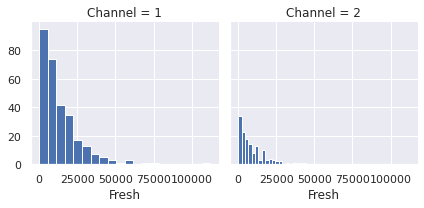

In [72]:
#Plot Fresh vs Channel (Faceted)
g = sns.FacetGrid(dataset, col='Channel')
g.map(plt.hist, 'Fresh', bins=20)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


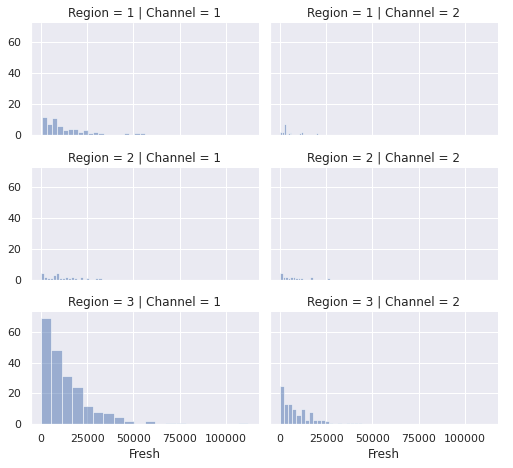

In [73]:
#Plot Fresh vs Channel (Faceted with Region)
grid = sns.FacetGrid(dataset, col='Channel', row='Region', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Fresh', alpha=.5, bins=20)
grid.add_legend();

# K-MEANS CLUSTERING

In [150]:
k_means = KMeans(n_clusters=2)  #To cluster based on channel 1 or 2
#Fit the training dataset x 
k_means.fit(x_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [151]:
#run the model tracking correct predictions
correct = 0.
for i in range(len(x_train)):
    predict_me = np.array(x_train[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = k_means.predict(predict_me)
    if prediction[0] == y_train[i].all():
        correct += 1

print(correct/len(x_train))

0.1534090909090909


In [152]:
#Double the iterations
k_means = k_means = KMeans(n_clusters=2, max_iter=600, algorithm = 'auto')
k_means.fit(x_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [153]:
correct = 0.
for i in range(len(x_train)):
    predict_me = np.array(x_train[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = k_means.predict(predict_me)
    if prediction[0] == y_train[i].all():
        correct += 1

print(correct/len(x_train))

0.1534090909090909


# Normalizing to get higher accuracy

In [0]:
# Normalize parameters in training dataframe X
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x_train)

In [154]:
k_means.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [155]:
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
       n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
       n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [156]:
correct = 0.
for i in range(len(x_train)):
    predict_me = np.array(x_train[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = k_means.predict(predict_me)
    if prediction[0] == y_train[i].all():
        correct += 1

print(correct/len(x_train))

0.7159090909090909
